In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from lib.data import fetch_data
from lib.ann import ANN

# Show Result

In [2]:
def plot_result(x, y, pred_y, loss_list, acc, filename="plot"):
    assert x.shape[0] == y.shape[0] and x.shape[0] == pred_y.shape[0]
    
    plt.figure(figsize=(13, 5))
    title = "Accuracy: " + acc
    plt.suptitle(title, fontsize=12, y=0.1)
    
    ax = plt.subplot(1, 3, 1)
    plt.title('Ground Truth', fontsize=18)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    for i in range (x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro', markersize=2)
        else:
            plt.plot(x[i][0], x[i][1], 'bo', markersize=2)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
    ax = plt.subplot(1, 3, 2)
    plt.title('Predict result', fontsize=18)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    for i in range (x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro', markersize=2)
        else:
            plt.plot(x[i][0], x[i][1], 'bo', markersize=2)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
    
    ax = plt.subplot(1, 3, 3)
    plt.title('Learning Curve', fontsize=18)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.plot(range(len(loss_list)), loss_list)
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    
    resultDir = "fig"
    path = os.path.join(os.getcwd(), resultDir) # (current working directory) 
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig("fig/"+filename+'.png')
    plt.show()


# Run

Settings:
Hidden Num     : 5         
Learning Rate  : 1         
Batch Size     : 1         
Activation     : sigmoid   
Loss           : mse       
Optimizer      : SGD       
Epochs         : 500       

Epochs    1, loss  0.25432
Epochs  100, loss  0.00621
Epochs  200, loss  0.00400
Epochs  300, loss  0.00338
Epochs  400, loss  0.00179
Epochs  500, loss  0.00022
Training finished
Accuracy: 100.00%


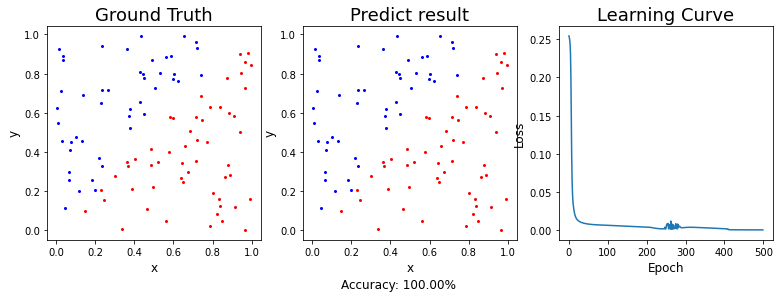

Epochs    1, loss  0.25047
Epochs  100, loss  0.20985
Epochs  200, loss  0.04392
Epochs  300, loss  0.03233
Epochs  400, loss  0.02766
Epochs  500, loss  0.02453
Training finished
Accuracy: 97.00%


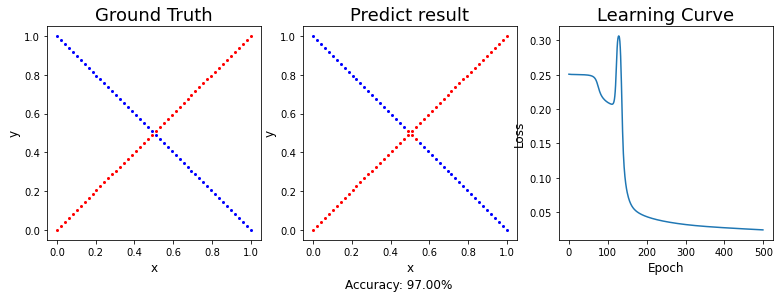

In [3]:
if __name__ == "__main__":
    ''' default '''
    n, num_step = 100, 500
    hidden_num, lr, bs, act_func, loss_func, optimizer = 5, 1, 1, "sigmoid", "mse", "SGD"

    ''' different optimizer '''
    # lr, optimizer = 1, "SGD"
    # lr, optimizer = 0.1, "Momentum"
    # lr, optimizer = 1, "AdaGrad"
    # lr, optimizer = 0.01, "Adam"
    # lr, optimizer = 0.01, "RMSProp"

    ''' different batch size '''
    # bs = 1
    # bs = 10
    # bs = 30

    ''' different loss function '''
    # lr, act_func, loss_func = 1, "sigmoid", "ce"
    # lr, act_func, loss_func = 0.05, "tanh", "mae"
    # lr, act_func, loss_func = 0.05, "ReLU", "mae"
    # lr, act_func, loss_func = 1, "sigmoid", "mae"
    # lr, act_func, loss_func = 0.05, "ReLU", "mse"
    # lr, act_func, loss_func = 1, "sigmoid", "mse"

    ''' different activation function '''
    # lr, act_func = 1, "sigmoid"
    # lr, act_func = 0.001, "nan"
    # lr, act_func = 0.05, "ReLU"
    # lr, act_func = 0.5, "tanh"

    print('Settings:')
    print("{:<15}: {:<10}".format("Hidden Num", hidden_num))
    print("{:<15}: {:<10}".format("Learning Rate", lr))
    print("{:<15}: {:<10}".format("Batch Size", bs))
    print("{:<15}: {:<10}".format("Activation", act_func))
    print("{:<15}: {:<10}".format("Loss", loss_func))
    print("{:<15}: {:<10}".format("Optimizer", optimizer))
    print("{:<15}: {:<10}".format("Epochs", num_step))
    print()

    ''' train, test and result '''
    for i in range(2):
        mode = "Linear" if i == 0 else "XOR"
        filename = mode + '_' + str(hidden_num) + '_' + act_func + '_' + loss_func + '_' + "{:.3f}".format(lr)
        data, label = fetch_data(mode, n)
        ann = ANN(hidden_num, learning_rate=lr, batch_size=bs, 
                act_func=act_func, loss_func=loss_func, optimizer=optimizer, 
                num_step=num_step)
        loss_list = ann.train(data, label)
        pred, acc = ann.test(data, label)
        plot_result(data, label, pred, loss_list, acc, filename)

    # output = ann.forward(data)
    # error  = output-label
    # print(' output   label  error')
    # for x, y, z in zip (output, label, error):
    #     print('% .2f' % x + '    % .2f' % y + '  % .5f' % z)
    